In [1]:
# import pkg
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [2]:
# load data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
x_train, x_test = x_train/255, x_test/255
print(x_train.shape, x_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)


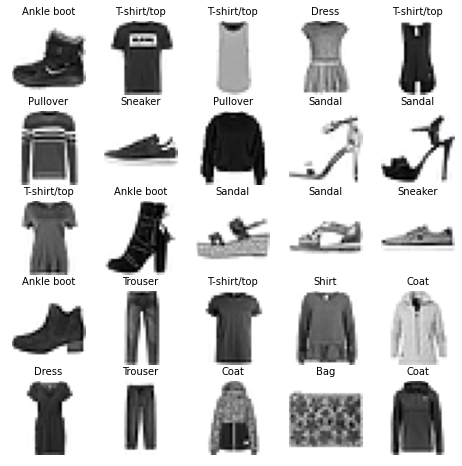

In [3]:
# 先大致查看要預測的數據
fig, axs = plt.subplots(5, 5, sharey=True, figsize=(8, 8))
for i in range(25):
    sub_ax = axs[i//5][i%5]
    sub_ax.get_xaxis().set_visible(False)
    sub_ax.get_yaxis().set_visible(False)
    sub_ax.set_title(class_names[y_train[i]], fontsize=10, )
    sub_ax.imshow(x_train[i], cmap=plt.cm.binary)
fig.show()

In [38]:
# CNN
model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)), 
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.2), # 防止over-fitting
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'), 
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Flatten(), # 攤平
        tf.keras.layers.Dense(10)
    ])

# 組合model
model.compile(optimizer='adam',
       loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
       metrics=['accuracy'])

# 模型架構
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 13, 13, 64)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 11, 11, 32)        18464     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 5, 5, 32)         

In [30]:
n_epoch = 10 # 訓練次數
history = model.fit(x_train, y_train, epochs=n_epoch, validation_split=0.3) # 驗證集採用train set的30%

Epoch 1/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.3591 - accuracy: 0.8710 - val_loss: 0.3253 - val_accuracy: 0.8839
Epoch 2/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.3348 - accuracy: 0.8787 - val_loss: 0.3115 - val_accuracy: 0.8873
Epoch 3/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.3158 - accuracy: 0.8855 - val_loss: 0.3024 - val_accuracy: 0.8892
Epoch 4/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.3073 - accuracy: 0.8876 - val_loss: 0.3022 - val_accuracy: 0.8897
Epoch 5/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.2927 - accuracy: 0.8930 - val_loss: 0.2967 - val_accuracy: 0.8919
Epoch 6/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.2820 - accuracy: 0.8978 - val_loss: 0.2748 - val_accuracy: 0.9009
Epoch 7/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.2763 - accuracy: 0.8993 - val_loss: 0.2720 - val_accuracy:

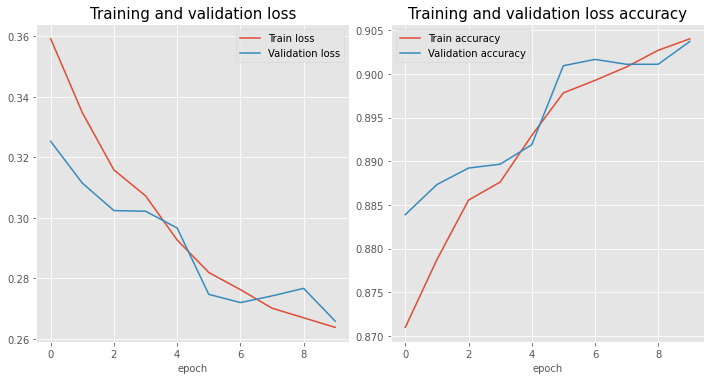

In [31]:
# 繪製loss and acc圖
his = history.history
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharex=True)
fig.tight_layout()
ax1.plot(his['loss'], label="Train loss")
ax1.plot(his['val_loss'], label="Validation loss")
ax2.plot(his['accuracy'], label="Train accuracy")
ax2.plot(his['val_accuracy'], label="Validation accuracy")

ax1.legend(fontsize=10);
ax2.legend(fontsize=10);

ax1.set_title('Training and validation loss', fontsize=15);
ax1.set_xlabel("epoch", fontsize=10);
ax2.set_title('Training and validation loss accuracy', fontsize=15);
ax2.set_xlabel("epoch", fontsize=10);

In [32]:
# 繪製混淆矩陣
from sklearn.metrics import confusion_matrix
y_pred = np.argmax(model.predict(x_test), axis=1) # 預測的分類
conf_matrix = confusion_matrix(y_test, y_pred)

313/313 [==============================] - 1s 2ms/step


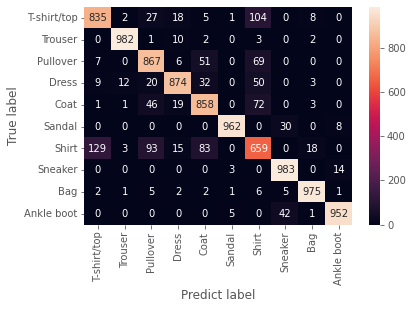

In [33]:
# 將混淆矩陣繪製成heatmap
import seaborn as sns
ax = sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names) # "d"為了顯示整數
ax.set(xlabel='Predict label', ylabel='True label')
plt.show()

In [34]:
# 找出正確為shirt, 但錯誤分類為T-shirt的類別
real_shirt_predict_tshirt_mask = (y_test == class_names.index("Shirt")) & (y_pred == class_names.index("T-shirt/top")) # and遮罩
real_shirt_count = np.sum(y_test == class_names.index("Shirt"))
real_shirt_predict_tshirt_count = np.sum(real_shirt_predict_tshirt_mask)
error_rate = real_shirt_predict_tshirt_count/real_shirt_count

In [35]:
# 預測錯誤的數量
print(real_shirt_predict_tshirt_count)

129


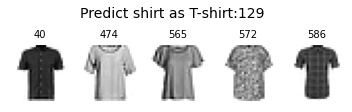

In [36]:
# 繪製五張被錯誤分類的圖形
fig, axs = plt.subplots(1, 5, sharey=True)

for i, img_i in enumerate(np.where(real_shirt_predict_tshirt_mask)[0][:5]):
    axs[i].imshow(x_test[img_i], cmap=plt.cm.binary)
    axs[i].get_xaxis().set_visible(False)
    axs[i].get_yaxis().set_visible(False)
    axs[i].set_title(img_i, fontsize=10)

fig.suptitle(f"Predict shirt as T-shirt:{real_shirt_predict_tshirt_count}", y=0.73, fontsize=14)
fig.show()